![SciPy Label](https://www.fullstackpython.com/img/logos/scipy.png)

<title>Scipy Tutorial!</title>

Special functions (scipy.special)

Integration (scipy.integrate)

Optimization (scipy.optimize)

Interpolation (scipy.interpolate)

Fourier Transforms (scipy.fft)

Signal Processing (scipy.signal)

Linear Algebra (scipy.linalg)

Sparse eigenvalue problems with ARPACK

Compressed Sparse Graph Routines (scipy.sparse.csgraph)

Spatial data structures and algorithms (scipy.spatial)

Statistics (scipy.stats)

Multidimensional image processing (scipy.ndimage)

File IO (scipy.io)

scipy.interpolation example:

In [3]:
# Import required Python libraries 
from scipy import interpolate 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Initialize linear space
x = np.linspace(0, 300, 25, endpoint=True)
print(x)
# Create a logistic growth example with added randomness
y = 30*np.random.randn(25)+(1000/(1+np.exp(-0.02*(x-0.1))))
print(y)

[  0.   12.5  25.   37.5  50.   62.5  75.   87.5 100.  112.5 125.  137.5
 150.  162.5 175.  187.5 200.  212.5 225.  237.5 250.  262.5 275.  287.5
 300. ]
[ 525.5275436   562.91432251  579.52432423  621.03959146  806.85509031
  803.90012137  818.96909645  874.83645394  831.00694835  895.55263533
  910.75889295  927.15295859  932.00476433  944.72760724  954.55580022
  929.77696534  999.30908195  984.1280224   969.83173274 1018.60481467
 1040.84764774  968.32081334  994.66021361 1044.55534335 1034.88542121]


<function matplotlib.pyplot.show(close=None, block=None)>

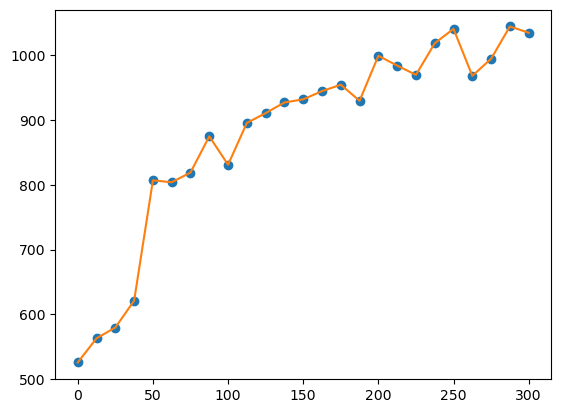

In [5]:
#plot raw data
plt.plot(x,y,'o')
sns.lineplot(x,y)
plt.show

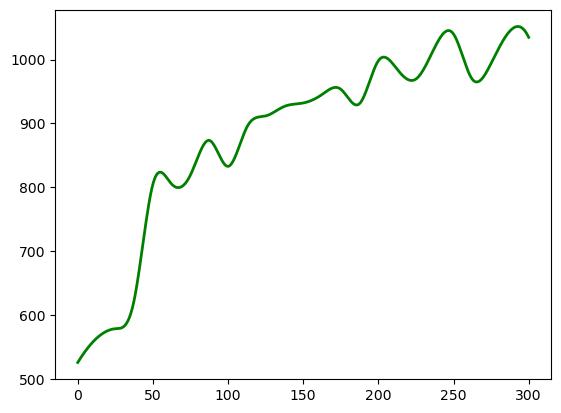

In [6]:
from scipy.interpolate import UnivariateSpline
#set one-dimensional smoothing spline as a function of x and y 
spl = UnivariateSpline(x,y)
#initialize sample space with more data points than observed
xs = np.linspace(0,300,1000)
#plot smoothed 
# sample data 
plt.plot(xs, spl(xs),'g',lw=2)
plt.show()

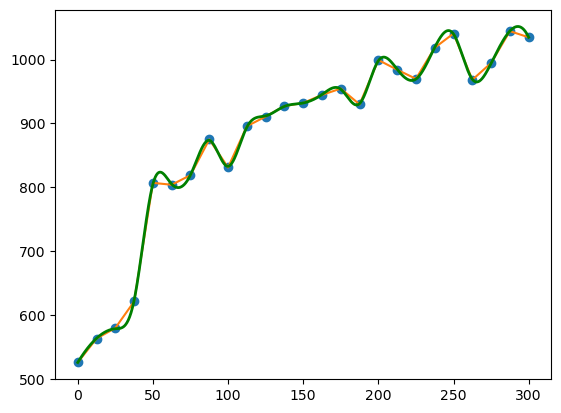

In [7]:
fig = plt.figure()
#plot raw data
plt.plot(x,y,'o')
sns.lineplot(x,y)
#plot smoothed data 
plt.plot(xs,spl(xs),'g',lw=2)

scipy.stats example:

In [8]:
# Time to import scipy stats
import scipy.stats as st

In [9]:
# Set up the data
penguins_df = sns.load_dataset('penguins')

penguins_df.info()
# Make a subset of Chinstrap
chinstrap = penguins_df.loc[penguins_df['species'] == 'Chinstrap']
chinstrap.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male


(3733.0882352941176, 381.4986213564681)


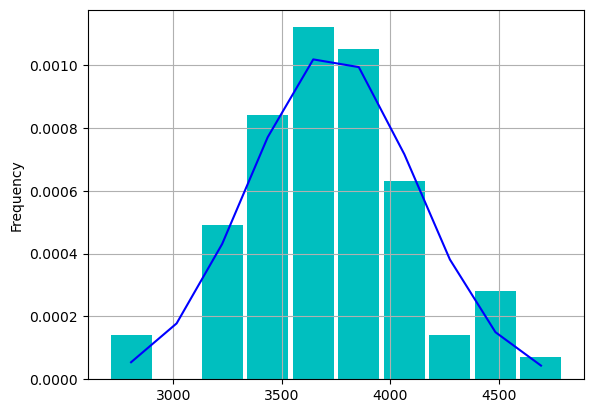

In [10]:
# Find standard deviation and mean
import chunk
fig1 = plt.figure()

# Make a histogram of body_mass_g for Chinstrap penguins
chinstrap_hist = chinstrap['body_mass_g'].plot.hist(grid=True, bins=10, rwidth=0.9, color='c', density=True)

# Now we can find the distribution curve for this variable
# First define the distribution type
distribution = st.norm
params = distribution.fit(chinstrap['body_mass_g'], loc=0)

# These parameters are the mean and standard deviation, in that order
print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]

y, x = np.histogram(chinstrap['body_mass_g']) 
x = (x + np.roll(x, -1))[:-1] / 2.0

# Plot!
pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
plt.plot(x,pdf,'b-')